[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tesouro/curso_basico_python/blob/main/Aula%205%20-%20Funções.ipynb)

# Aula 5 - Funções
<div class="alert alert-block alert-info" style="border-left: 5px solid #0056b3;">
    <h4>🎯 Objetivos de Aprendizagem da Aula</h4>
    <ul style="margin-left: 20px;">
    <li>A Motivação para Funções: O princípio DRY ("Don't Repeat Yourself" - Não se Repita)</li>
    <li>Variáveis globais e locais</li>    
    <li>Anatomia de uma Função: def, nome, parâmetros (), docstring e return.</li>
    <li>Parâmetros e Argumentos: Como "passar ingredientes" para sua função.</li>
    </ul>
</div>


## 1. Uma breve contextualização sobre funções
Durante as últimas semanas, nós usamos diversas funções sem saber que elas eram funções de fato. Por exemplo, print(), len(), int() e type(). Elas são ferramentas pré-construídas do Python.

Mas e se precisarmos realizar uma tarefa específica e repetitiva para a qual não existe uma ferramenta pronta? Por exemplo, calcular a rentabilidade real de um investimento, descontando a inflação, várias e várias vezes.

Em vez de copiar e colar o mesmo bloco de código, nós criamos nossa própria ferramenta: uma função.

Princípio-Chave: DRY (Don't Repeat Yourself)
Na programação, se você se pegar copiando e colando o mesmo trecho de código, é um forte sinal de que você deveria criar uma função para essa tarefa.

In [ ]:
print("--- Abordagem Sem Funções ---")

# Cenário 1: Título Público com alta nominal em período de inflação moderada.
rentabilidade_nominal_1 = 0.12  # 12%
inflacao_periodo_1 = 0.07      # 7%

# A fórmula é aplicada diretamente.
rentabilidade_real_1 = ((1 + rentabilidade_nominal_1) / (1 + inflacao_periodo_1)) - 1
print(f"Cenário 1 - Rentabilidade Real: {rentabilidade_real_1:.2%}")


# Cenário 2: Fundo de Renda Fixa em período de inflação mais alta.
rentabilidade_nominal_2 = 0.10  # 10%
inflacao_periodo_2 = 0.08      # 8%

# Note que o código abaixo é uma CÓPIA EXATA do cálculo acima, apenas com variáveis diferentes.
rentabilidade_real_2 = ((1 + rentabilidade_nominal_2) / (1 + inflacao_periodo_2)) - 1
print(f"Cenário 2 - Rentabilidade Real: {rentabilidade_real_2:.2%}")


# Cenário 3: Poupança, onde a rentabilidade nominal é igual à inflação.
rentabilidade_nominal_3 = 0.05  # 5%
inflacao_periodo_3 = 0.05      # 5%

# Mais uma vez, a mesma lógica é copiada e colada.
rentabilidade_real_3 = ((1 + rentabilidade_nominal_3) / (1 + inflacao_periodo_1)) - 1
print(f"Cenário 3 - Rentabilidade Real: {rentabilidade_real_3:.2%}")

Perceba que, se a fórmula precisasse de um ajuste, teríamos que fazer alterações em três pontos diferentes do código. Isso é ruim pois leva a bugs (como copiar código e alterar o nome de uma variável, mas não de outra). 

Como exemplo, **o código acima possui um erro de copia e cola**. Você consegue detectá-lo?

In [ ]:
print("--- Abordagem Com Funções ---")

def calcular_rentabilidade_real(rentabilidade_nominal, inflacao):
    """
    Calcula a rentabilidade real de um investimento, descontando a inflação.
    Ambas as taxas devem ser informadas em formato decimal (ex: 0.1 para 10%).
    """
    # A lógica do cálculo é definida UMA ÚNICA VEZ, aqui dentro.
    rentabilidade_real = ((1 + rentabilidade_nominal) / (1 + inflacao)) - 1
    return rentabilidade_real

# Agora, em vez de repetir o cálculo, nós simplesmente CHAMAMOS nossa nova ferramenta.

# Cenário 1
resultado_1 = calcular_rentabilidade_real(0.12, 0.07)
print(f"Cenário 1 - Rentabilidade Real: {resultado_1:.2%}")

# Cenário 2
resultado_2 = calcular_rentabilidade_real(0.10, 0.08)
print(f"Cenário 2 - Rentabilidade Real: {resultado_2:.2%}")

# Cenário 3
resultado_3 = calcular_rentabilidade_real(0.05, 0.05)
print(f"Cenário 3 - Rentabilidade Real: {resultado_3:.2%}")

# Podemos até usá-la com novos dados diretamente.
resultado_4 = calcular_rentabilidade_real(0.15, 0.04) # Um novo cenário
print(f"Cenário 4 - Rentabilidade Real: {resultado_4:.2%}")

Dessa vez, usando funções, a lógica do cálculo fica em uma "caixa-preta". As variáveis utilizadas são parametrizadas de modo que é possível chamar a função com quaisquer valores de rentabilidade nominal e inflação. 
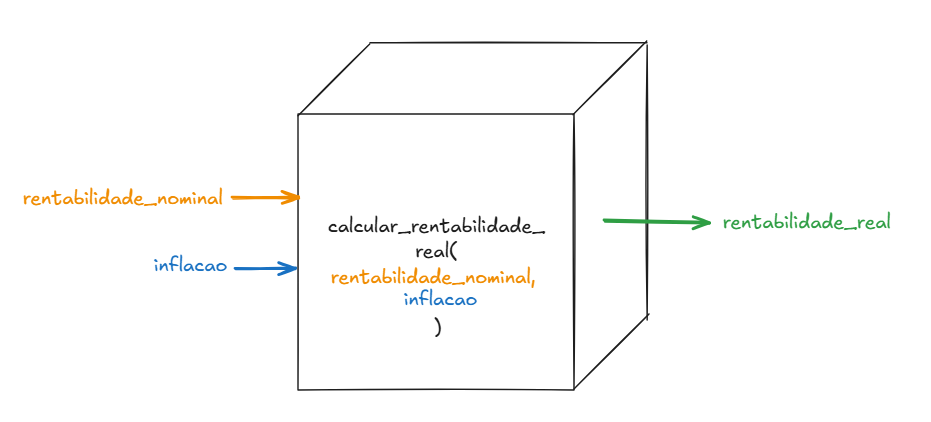

Mais do que isso: não precisamos repetir o mesmo código diversas vezes! Desse modo, caso seja necessário mudar a fórmula, é possível mudar o código em apenas um lugar óbvio.

### 1.1. Como definir uma função

No python, funções são definidas com a palavra-chave `def`, seguidas do nome da funções e quais argumentos você quer passar para a função entre parenteses.

Imaginemos que você quer uma função que você passa um número e a função retorna o número ao quadrado:

In [ ]:
def elevar_quadrado(numero):
  return numero ** 2

### 1.2. Como invocar uma função
Perceba que quando você roda a cédula acima, nada acontece. Isso ocorre porque você apenas definiu o que é a função, mas você não a invocou. 

Para invocá-la, você precisaria fazer o seguinte:

In [ ]:
def elevar_quadrado(numero):
  return numero ** 2

x = elevar_quadrado(4) # coloca o número 4 dentro da função elevar_quadrado e coloca esse valor na variável x
print(x) # imprime o valor de x

### 1.3. Como incluir argumentos/parâmetros
Você pode incluir quantos argumentos você quiser em uma função – apenas atente-se que, quando você chamá-la, por padrão, você precisa incluir as variáveis na ordem certa.

In [ ]:
def multiplicar_e_adicionar(num1, num2, num3):
  return (num1 * num2) + num3

y = multiplicar_e_adicionar(1,2,3) # 1 é colocado como num1, 2 é colocado como num2, 3 é colocado como num3
print(y)

### 1.4. Como incluir argumentos fora da ordem padrão
Se você quiser passar os parâmetros em uma ordem diferente do padrão, você precisa nomeá-los explicitamente.

In [ ]:
def multiplicar_e_adicionar(num1, num2, num3):
  return (num1 * num2) + num3

y = multiplicar_e_adicionar(1, num3=3,num2=2) # 1 é colocado como num1, 3 é colocado como num3, 2 é colocado como num2
print(y)

### 1.5. Como definir valores padrões
Outra utilidade das funções é poder designar "valores padrões" para os argumentos.

In [ ]:
def elevar_numero(numero, expoente=2): # o expoente padrão dessa função é 2 (elevar ao quadrado)
  return numero ** expoente

print(elevar_numero(3)) # eu posso chamar a função sem especificar o expoente, o valor padrão é 2
print(elevar_numero(4)) # eu posso chamar a função sem especificar o expoente, o valor padrão é 2
print(elevar_numero(2, 3)) # mas eu posso colocar outro valor do expoente, no caso elevar ao cubo
print(elevar_numero(10, 4)) # mas eu posso colocar outro valor do expoente, no caso elevar à quarta

### 1.6. Como fazer funções sem argumentos e sem retorno

Também é possível fazer funções sem nenhum argumento e sem nenhum retorno (apesar de que, provavelmente, não será uma função muito útil).

In [ ]:
def mensagem():
  print("Oi")
  print("Seja bem-vindo!")
  print("Espero que você se divirta!")

mensagem()

### 1.6.1. Diferença entre print() e return
- O print() imprime uma informação na tela
- O return retorna um dado da função

Perceba a diferença no código abaixo:

In [ ]:
def test_sem_return():
    print("oi")
    
a = test_sem_return()
print(a) # perceba que a variável não contém nenhum informação (None)

In [ ]:
def test_com_return():
    return "oi"

b = test_com_return()
print(b) # perceba que a variável contém uma informação (a string "oi")

### 1.7. Como passar um número variável de argumentos
Também é possível fazer uma função quando você não sabe quantos argumentos serão passados usando a palavra chave *args

In [ ]:
def multiplicar_todos(*args):
  mult = 1
  for num in args: # as variáveis estão dentro da lista args
    mult = mult * num
  return mult

print(multiplicar_todos(1,2,3,4,5,6)) # experimente colocar mais números como argumentos

### 1.8. Como passar um número variável de chaves de dicionário
Além de listas, é possível passar um dicionário de tamanho indefinido usando a palavra-chave **kwargs

In [ ]:
def imprimir_dict(**kwargs):
  for key, value in kwargs.items():
    print(f"Chave {key} possui o valor {value}.")

imprimir_dict(a=1, b=2, c=3, d=4) # experimente passar diferentes números de argumentos

### 1.9. Variáveis globais e locais

Quando você declara uma variável fora de uma função, essa variável é chamada de variável global porque ela está no escopo do programa inteiro.

Quando você declara uma variável dentro da função, essa variável é uma variável local, ela só existe dentro do escopo da função.

In [2]:
x = 2 # x é uma variável global

def func_exemplo():
  y = 3 # y é uma variável local
  return y

func_exemplo()
print(x*y)

NameError: name 'y' is not defined

Perceba que você não tem acesso à uma variável local fora da função: se você tentar acessá-la, o python dará uma mensagem de erro.

Isso é uma característica muito importante de entender – todas as variáveis declaradas dentro da função são destruídas após a função terminar. Tudo que sobra é o que foi retornado via `return`

- Quando você quiser passar algum valor de uma variável para a função, o jeito mais claro é passar o valor como argumento
- Quando você quiser retornar algum valor da função de volta para o escopo global, o jeito mais claro é usar o `return` no final da função

### 1.10. Antipadrão: usar `global`

Em Python, por padrão, as funções podem ler variáveis globais, mas não podem modificá-las.

In [11]:
x = 2 
y = 3

def func_exemplo():
  x = 4
  y = 5
  return x*y

print(func_exemplo()) # aqui a função retorna 20, pois x e y dentro da função são 4 e 5, respectivamente
print(x) # perceba que x é 2, pois a variável x dentro da função é local
print(y) # perceba que y é 3, pois a variável y dentro da função é local

20
2
3


Existe a opção de usar a palavra-chave `global` para manipular uma variável global dentro do contexto de uma função, **mas isso é considerado uma má prática**, uma vez que, em um programa complexo, é muito mais difícil depurar o código (pois ele pode estar sendo modificado em qualquer lugar!).

Uma função que usa `global` também viola o princípio da função pura, descrito a seguir.

In [ ]:
x = 2 
y = 3

def func_exemplo():
  global x, y # aqui eu estou dizendo que quero usar as variáveis globais x e y
  x = 4
  y = 5
  return x*y

print(func_exemplo())
print(x) # agora os valores de x e y foram alterados no contexto global
print(y)

20
4
5


### 1.11. Funções puras
Uma função é considerada pura quando obedece a duas regras estritas:

- Mesma Entrada, Sempre a Mesma Saída: Para os mesmos argumentos de entrada, a função sempre retornará o mesmo resultado, não importa quantas vezes seja chamada ou o que esteja acontecendo no resto do programa. Ela não depende de nenhuma variável global, do tempo, ou de dados externos.

- Sem Efeitos Colaterais: A função não modifica nada fora de seu próprio escopo. Ela não altera variáveis globais, não escreve em arquivos, não imprime na tela, não se conecta a um banco de dados. Seu único trabalho é receber "ingredientes" (argumentos) e "entregar um prato pronto" (o valor de `return`).

In [ ]:
# Exemplo de função pura
def calcular_imposto_puro(valor, taxa):
    """
    Esta função é PURA. Seu resultado depende apenas
    dos argumentos que ela recebe.
    """
    return valor * taxa

# Não importa quantas vezes chamamos, o resultado é sempre o mesmo para as mesmas entradas.
print(f"Puro - Cenário 1: {calcular_imposto_puro(1000, 0.2)}")
print(f"Puro - Cenário 2: {calcular_imposto_puro(1000, 0.2)}")

In [ ]:
# Exemplo de função impura
taxa_global_de_imposto = 0.2 # Uma variável externa (global)

def calcular_imposto_impuro(valor):
    """
    Esta função é IMPURA. Seu resultado depende de uma
    variável que está fora de seu escopo.
    """
    return valor * taxa_global_de_imposto

# A primeira chamada funciona como esperado
print(f"Impuro - Cenário 1: {calcular_imposto_impuro(1000)}")

# Agora, imagine que em outra parte do código, essa variável global é alterada...
taxa_global_de_imposto = 0.25 

# Chamamos a função novamente com a MESMA entrada (1000), mas o resultado é DIFERENTE!
print(f"Impuro - Cenário 2: {calcular_imposto_impuro(1000)}")

### 1.12. Docstrings
Até agora, criamos várias funções. Mas como outra pessoa (ou você mesmo, daqui a três meses) saberia rapidamente o que sua função calcular_rentabilidade_real() faz, quais "ingredientes" (parâmetros) ela espera e o que ela devolve como resultado?

É para isso que serve uma docstring (abreviação de documentation string, ou "texto de documentação"). É a primeira coisa que colocamos dentro de uma função, entre três aspas duplas ("""..."""), e serve como o manual de instruções oficial daquela função.

In [ ]:
# Abordagem COM docstring (clara e profissional)
def calcular_retorno_total(preco_compra, preco_venda, dividendos):
    """
    Calcula o retorno total de um ativo, incluindo a variação de preço e os dividendos.

    Args:
        preco_compra (float): O preço de aquisição do ativo.
        preco_venda (float): O preço de venda do ativo.
        dividendos (float): O total de dividendos recebidos no período.

    Returns:
        float: O valor do retorno total em formato percentual.
    """
    retorno = ((preco_venda - preco_compra + dividendos) / preco_compra) * 100
    return retorno

Se você usar a função help() em uma função que você criou, ele irá exibir o seu "manual de instruções" formatado.

In [ ]:
# Peça "ajuda" sobre a função que acabamos de criar
help(calcular_retorno_total)

## 2. Exercícios

1. Faça uma função chamada gerar_cabecalho que recebe o nome de uma empresa como argumento e imprime um cabeçalho padronizado para um relatório de análise.

In [1]:
def gerar_cabecalho(nome_empresa):
    print(f"RELATÓRIO DE ANÁLISE DA EMPRESA: {nome_empresa}")

gerar_cabecalho("Minha Empresa S.A.")

RELATÓRIO DE ANÁLISE DA EMPRESA: Minha Empresa S.A.


2. Para avaliar o sucesso de um investimento, não basta olhar a variação do preço; é preciso incluir os dividendos recebidos. A fórmula do Retorno Total é:

Retorno Total = (Preço de Venda - Preço de Compra + Dividendos)/Preço de Compra

Faça uma função calcular_retorno_total que recebe três argumentos (preco_compra, preco_venda, dividendos) e retorna o valor do retorno.
Coloque tal valor em uma variável e imprima o resultado.

In [3]:
def calcular_retorno_total(preco_compra, preco_venda, dividendos):
    retorno = (preco_venda - preco_compra + dividendos) / preco_compra
    
    return retorno

# --- Exemplo de Uso ---
valor_compra = 50.00  # Compramos uma ação por R$ 50,00
valor_venda = 55.00   # Vendemos a ação por R$ 55,00
dividendos_recebidos = 2.00 # Recebemos R$ 2,00 em dividendos

retorno_calculado = calcular_retorno_total(valor_compra, valor_venda, dividendos_recebidos)

retorno_percentual = retorno_calculado * 100

print(f"Dados do Investimento:")
print(f"  - Preço de Compra: R$ {valor_compra:.2f}")
print(f"  - Preço de Venda:  R$ {valor_venda:.2f}")
print(f"  - Dividendos:    R$ {dividendos_recebidos:.2f}")
print("-" * 30)

# Usamos a formatação de f-string (:.2f) para mostrar o resultado com 2 casas decimais
print(f"O retorno total do investimento foi de {retorno_percentual:.2f}%")

Dados do Investimento:
  - Preço de Compra: R$ 50.00
  - Preço de Venda:  R$ 55.00
  - Dividendos:    R$ 2.00
------------------------------
O retorno total do investimento foi de 14.00%


3. Um gestor de risco pode precisar comparar a performance de 3, 5 ou 20 ativos de uma vez para encontrar o de pior desempenho. Como criar uma função que aceite um número variável de "rentabilidades"?

Faça uma função chamada encontrar_pior_performance que possa receber um número indeterminado de valores de rentabilidade e retorne o menor valor entre todos.

In [2]:
def encontrar_pior_performance(*rentabilidades):
    if not rentabilidades:
        return None  # Retorna None se a função for chamada sem argumentos.
    
    pior_performance = min(rentabilidades)
    
    return pior_performance


# Cenário 1: Comparando 3 ativos
pior_ativo_cenario1 = encontrar_pior_performance(0.12, 0.05, -0.02)
print(f"A pior performance foi de {pior_ativo_cenario1 * 100:.2f}%")

A pior performance foi de -2.00%


4. Faça uma função projetar_valor_futuro que calcula juros compostos. Ela deve aceitar o valor_inicial, o numero_de_anos, e a taxa_juros_anual. A taxa_juros_anual deve ter um valor padrão de 0.07 (7%), caso o usuário não forneça uma.

In [4]:
def projetar_valor_futuro(valor_inicial, numero_de_anos, taxa_juros_anual=0.07):
    valor_final = valor_inicial * (1 + taxa_juros_anual) ** numero_de_anos
    
    return valor_final

investimento_inicial = 1000.00
periodo_anos = 10

valor_cenario1 = projetar_valor_futuro(investimento_inicial, periodo_anos)

print(f"Investindo R$ {investimento_inicial:,.2f} por {periodo_anos} anos...")
# A formatação ",.2f" adiciona separador de milhar e formata com 2 casas decimais
print(f"O valor futuro projetado é de R$ {valor_cenario1:,.2f}")
print("\n")

Investindo R$ 1,000.00 por 10 anos...
O valor futuro projetado é de R$ 1,967.15




5. O código abaixo gera dados aleatórios e depois os processa com três laços for separados para criar um gráfico de dispersão. Sua tarefa é encapsular toda a lógica de processamento e plotagem dentro de uma única função chamada plotar_dispersao(lista_de_dados). A função deve receber a lista de tuplas como argumento e gerar o gráfico.

In [ ]:
import random
import matplotlib.pyplot as plt

def plotar_dispersao(lista_de_dados):
    # Extrai os dados das tuplas
    coordenadas_x = [tupla[0] for tupla in lista_de_dados]
    coordenadas_y = [tupla[1] for tupla in lista_de_dados]
    tamanhos_pontos = [tupla[2] for tupla in lista_de_dados]

    # Cria o gráfico de dispersão
    plt.figure(figsize=(10, 6))
    plt.scatter(coordenadas_x, coordenadas_y, s=tamanhos_pontos, c=coordenadas_y, cmap='viridis', alpha=0.7)
    plt.title('Gráfico de Dispersão Aleatório')
    plt.xlabel('Eixo X (Variável Independente)')
    plt.ylabel('Eixo Y (Variável Dependente)')
    plt.colorbar(label='Intensidade (cor)')
    plt.grid(True)
    plt.show()

# Geração de dados aleatórios para teste
dados_brutos = [(random.randint(0, 100), random.randint(0, 1000), random.randint(0, 1000)/10) for _ in range(50)]

# Chamada da função com os dados gerados
plotar_dispersao(dados_brutos)

<hr style="height:3px; border-width:0; color:gray; background-color:gray">

## 3. Bug Hunt
Os códigos abaixo possuem algum tipo de problema. Leia o código e a mensagem de erro atentamente e tente solucionar o bug!
Descreva o erro e a solução com suas próprias palavras.

In [5]:
def calcular_area_retangulo(largura, altura):
    area = largura * altura
    print(f"A área calculada é: {area}")

area_calculada = calcular_area_retangulo(10, 5)
print(f"\nO valor armazenado na variável 'area_calculada' é: {area_calculada}")

A área calculada é: 50

O valor armazenado na variável 'area_calculada' é: None


A função está usando um print() em vez de um return

In [6]:
def calcular_imposto(valor_base):
    taxa_imposto = 0.275 # Esta variável foi criada DENTRO da função
    imposto_devido = valor_base * taxa_imposto
    return imposto_devido

valor_faturado = 10000
imposto_a_pagar = calcular_imposto(valor_faturado)

# A linha abaixo vai dar um NameError. Por quê?
print(f"A taxa de imposto aplicada foi de {taxa_imposto}")

NameError: name 'taxa_imposto' is not defined

Variáveis de funções têm escopo local, não estão acessíveis no escopo global

In [7]:
x = 2 
y = 3

def func_exemplo():
  global x, y # aqui eu estou dizendo que quero usar as variáveis globais x e y
  x = 4
  y = 5
  return x*y


print(x) # por quê os valores de x e y não foram alterados para 4 e 5?
print(y)
print(func_exemplo())

2
3
20


Os valores de x e y foram alterados, mas apenas depois de a função ser invocada. Você observaria os valores alterados se imprimisse x e y após func_exemplo()

<hr style="height:3px; border-width:0; color:gray; background-color:gray">

# 4. Projetos para você fazer!

1. Crie um programa que calcula uma versão simplificada do Imposto de Renda. O programa deve ser organizado com, no mínimo, duas funções:

- `calcular_base_tributavel(renda_bruta, deducoes)`: Esta função recebe a renda anual e uma lista de valores de dedução. Ela deve somar as deduções e subtraí-las da renda bruta para encontrar a base de cálculo do imposto.

- `calcular_imposto_devido(base_tributavel)`: Esta função recebe a base de cálculo e aplica uma lógica de if/elif/else para determinar a alíquota e calcular o valor final do imposto devido, com base em faixas de renda que você pode definir (ex: isento até 30k, 15% de 30k a 70k, 27.5% acima de 70k).

O programa principal deve pedir os dados ao usuário, chamar as funções na ordem correta e, ao final, imprimir um resumo claro: "Para uma renda de R$ X com deduções de R$ Y, o imposto devido é de R$ Z."

In [9]:
def calcular_base_tributavel(renda_bruta, deducoes):
    total_deducoes = sum(deducoes)
    base_tributavel = renda_bruta - total_deducoes
    return base_tributavel

def calcular_imposto_devido(base_tributavel):
    if base_tributavel <= 30000:
        return 0.0
    elif base_tributavel <= 70000:
        return (base_tributavel - 30000) * 0.15
    else:
        imposto_faixa_1 = (70000 - 30000) * 0.15
        imposto_faixa_2 = (base_tributavel - 70000) * 0.275
        return imposto_faixa_1 + imposto_faixa_2

# Programa principal
try:
    renda_bruta = float(input("Informe sua renda bruta anual (em R$): "))
    num_deducoes = int(input("Quantas deduções você deseja informar? "))
    deducoes = []

    for i in range(num_deducoes):
        valor = float(input(f"Informe o valor da dedução #{i+1} (em R$): "))
        deducoes.append(valor)

    base = calcular_base_tributavel(renda_bruta, deducoes)
    imposto = calcular_imposto_devido(base)

    print(f"\nPara uma renda de R$ {renda_bruta:.2f}, o imposto devido é de R$ {imposto:.2f}.")

except ValueError:
    print("Erro: Por favor, insira valores numéricos válidos.")


Informe sua renda bruta anual (em R$):  200000
Quantas deduções você deseja informar?  2
Informe o valor da dedução #1 (em R$):  10000
Informe o valor da dedução #2 (em R$):  40000



Para uma renda de R$ 200000.00, o imposto devido é de R$ 28000.00.


2. Reescreva um programa que você já fez (e.g. o jogo da velha do capítulo 4), dessa vez usando funções para deixar seu código mais limpo.

In [13]:
def exibir_tabuleiro(tabuleiro, mostrar_numeros=False):
    print("\n")
    for i in range(3):
        linha = []
        for j in range(3):
            if mostrar_numeros:
                linha.append(str(3 * i + j + 1))
            else:
                linha.append(tabuleiro[i][j])
        print(" | ".join(linha))
        if i < 2:
            print("-" * 9)

def verificar_vencedor(tabuleiro, jogador):
    for i in range(3):
        if all(tabuleiro[i][j] == jogador for j in range(3)) or all(tabuleiro[j][i] == jogador for j in range(3)):
            return True
    if all(tabuleiro[i][i] == jogador for i in range(3)) or all(tabuleiro[i][2 - i] == jogador for i in range(3)):
        return True
    return False

def verificar_empate(tabuleiro):
    return all(celula in ["X", "O"] for linha in tabuleiro for celula in linha)

def realizar_jogada(tabuleiro, jogador):
    while True:
        try:
            posicao = int(input(f"Jogador {jogador}, escolha uma posição (1-9): "))
            if 1 <= posicao <= 9:
                linha = (posicao - 1) // 3
                coluna = (posicao - 1) % 3
                if tabuleiro[linha][coluna] == " ":
                    tabuleiro[linha][coluna] = jogador
                    break
                else:
                    print("Essa posição já está ocupada. Tente novamente.")
            else:
                print("Posição inválida. Escolha um número de 1 a 9.")
        except ValueError:
            print("Entrada inválida. Digite um número inteiro.")

def jogar():
    tabuleiro = [[" " for _ in range(3)] for _ in range(3)]
    jogador_atual = "X"
    primeira_vez = True
    while True:
        exibir_tabuleiro(tabuleiro, mostrar_numeros=primeira_vez)
        primeira_vez = False
        realizar_jogada(tabuleiro, jogador_atual)
        if verificar_vencedor(tabuleiro, jogador_atual):
            exibir_tabuleiro(tabuleiro)
            print(f"Parabéns! Jogador {jogador_atual} venceu!")
            break
        elif verificar_empate(tabuleiro):
            exibir_tabuleiro(tabuleiro)
            print("Empate!")
            break
        jogador_atual = "O" if jogador_atual == "X" else "X"

# Inicia o jogo
jogar()




1 | 2 | 3
---------
4 | 5 | 6
---------
7 | 8 | 9


Jogador X, escolha uma posição (1-9):  5




  |   |  
---------
  | X |  
---------
  |   |  


Jogador O, escolha uma posição (1-9):  1




O |   |  
---------
  | X |  
---------
  |   |  


Jogador X, escolha uma posição (1-9):  4




O |   |  
---------
X | X |  
---------
  |   |  


Jogador O, escolha uma posição (1-9):  5


Essa posição já está ocupada. Tente novamente.


Jogador O, escolha uma posição (1-9):  6




O |   |  
---------
X | X | O
---------
  |   |  


Jogador X, escolha uma posição (1-9):  7




O |   |  
---------
X | X | O
---------
X |   |  


Jogador O, escolha uma posição (1-9):  2




O | O |  
---------
X | X | O
---------
X |   |  


Jogador X, escolha uma posição (1-9):  3




O | O | X
---------
X | X | O
---------
X |   |  
Parabéns! Jogador X venceu!


<hr style="height:3px; border-width:0; color:gray; background-color:gray">

## 5. Perguntas para Discussão em Grupo

1. O que significa que a função "abstrai" o código? Por quê isso é útil, na prática?

Abstração em programação significa esconder os detalhes da implementação e expor apenas o que é necessário para usar o código.

2. Imagine uma função x() que possui duas etapas: ele lê um arquivo .csv e imprime o conteúdo do arquivo na tela.

O que aconteceria se eu invocasse essa função um milhão de vezes em loop? Como você poderia deixar isso mais eficiente?

Se a função x() lê o arquivo .csv do disco toda vez que é chamada, isso será extremamente ineficiente. Ler arquivos é uma operação custosa em tempo e recursos.

Ler o arquivo uma única vez e armazenar os dados em memória (por exemplo, em uma lista ou DataFrame).

3. "Vocês estão projetando uma função para calcular os juros de um título. Uma opção é calcular_juros(capital, taxa_decimal, numero_dias). Outra é calcular_juros(dados_titulo), onde dados_titulo é um dicionário contendo tudo ({'capital':..., 'taxa':..., 'dias':...}). Qual abordagem vocês preferem e por quê? Discutam as vantagens e desvantagens de cada uma em termos de clareza, flexibilidade e risco de erro ao chamar a função.

Para funções simples e diretas, prefira parâmetros explícitos.
Para sistemas mais complexos ou dados estruturados, prefira o uso de dicionários ou objetos.

## 6. Sugestões de pesquisa

1) O que são funções anônimas ou funções lambda em Python?

In [14]:
# funções simples e rápidas
numeros = [1, 2, 3, 4, 5]
dobrados = list(map(lambda x: x * 2, numeros))
print(dobrados)  # [2, 4, 6, 8, 10]

[2, 4, 6, 8, 10]


2) Explique o código abaixo:

In [ ]:
def fatorial_recursivo(n):
    # Condição de parada: o fatorial de 0 é 1
    if n == 0:
        return 1
    # A função chama a si mesma com um problema menor (n-1)
    else:
        return n * fatorial_recursivo(n - 1)

print(f"O fatorial de 5 é: {fatorial_recursivo(5)}")

3. O que é um decorador no Python (a sintaxe com @ antes de uma função)?

Um decorador em Python é uma função especial que modifica o comportamento de outra função, sem alterar diretamente seu código. A sintaxe com @ antes de uma função é usada para aplicar esse decorador de forma clara e elegante.

In [15]:
def meu_decorador(func):
    def wrapper():
        print("Antes da função")
        func()
        print("Depois da função")
    return wrapper

@meu_decorador
def saudacao():
    print("Olá!")

saudacao()

Antes da função
Olá!
Depois da função


4. Explique qual é o problema do código abaixo:

Dica: pesquise por memoização (*memoization*)

In [16]:
import time

def fibonacci_sem_memo(n: int) -> int:
    if n <= 1:
        return n
    
    else:
        return fibonacci_sem_memo(n - 1) + fibonacci_sem_memo(n - 2)

numero = 37 # a performance dessa função é muito ruim para números grandes

print(f"Calculando Fibonacci de {numero} (sem memoização)...")

start_time = time.perf_counter()
resultado = fibonacci_sem_memo(numero)
end_time = time.perf_counter()

tempo_execucao = end_time - start_time

print(f"\nResultado: O Fibonacci de {numero} é {resultado}.")
print(f"Tempo de execução: {tempo_execucao:.4f} segundos.")

Calculando Fibonacci de 37 (sem memoização)...

Resultado: O Fibonacci de 37 é 24157817.
Tempo de execução: 5.9631 segundos.


O resultado não está sendo salvo, de modo que os mesmos números estão sendo calculados milhões de vezes.

A solução é salvar números já calculados.

In [16]:
import time

# 1. Usamos um dicionário 'memo' para ser nosso cache (caderno de anotações).
#    Ele é passado como um argumento padrão para que seja compartilhado entre as chamadas recursivas.
def fibonacci_com_memo(n: int, memo: dict = {}) -> int:
    # 2. A primeira coisa que fazemos é checar se o resultado para 'n' já está no cache.
    if n in memo:
        return memo[n]
    
    # Condição de parada (base da recursão)
    if n <= 1:
        return n
    
    # 3. Se não estiver no cache, calculamos o resultado recursivamente.
    #    Note que passamos o mesmo dicionário 'memo' para as chamadas internas.
    resultado = fibonacci_com_memo(n - 1, memo) + fibonacci_com_memo(n - 2, memo)
    
    # 4. E o mais importante: salvamos o resultado recém-calculado no cache antes de retornar.
    memo[n] = resultado
    
    return resultado

numero = 37

print(f"Calculando Fibonacci de {numero} (COM memoização)...")

start_time = time.perf_counter()
resultado = fibonacci_com_memo(numero)
end_time = time.perf_counter()

tempo_execucao = end_time - start_time

print(f"\nResultado: O Fibonacci de {numero} é {resultado}.")
print(f"Tempo de execução: {tempo_execucao:.4f} segundos.")

Calculando Fibonacci de 37 (COM memoização)...

Resultado: O Fibonacci de 37 é 24157817.
Tempo de execução: 0.0006 segundos.


5. Pesquise o que são `type hints` e tente explicar a sua vantagem (como no código abaixo):

In [ ]:
def calcular_retorno_total(preco_compra:float, 
                           preco_venda:float, 
                           dividendos:float) -> float:
    retorno = ((preco_venda - preco_compra + dividendos) / preco_compra) * 100
    return retorno

Aumenta a legibilidade do código, diminui o número de bugs